# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений
Выполнили студентки группы 1381 Васильева Ольга и Денисова Ольга. Вариант №2.

## Цель работы
Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).    

## Основные теоретические положения
Дискретное преобразование Фурье
Пусть s(t) - дискретный периодический сигнал. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье:
$ Ф(n) = \sum_{k=0}^{N-1} s_{k}*e^{-ik\frac{2*\pi*n}{N}}, n = 0, 1, 2, ..., N -1 $
где n - n-ая частота ω,  равная $ \frac{2 * \pi * n}{N} $


## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos{(\omega_kt+φ_k)}$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\triangle \omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

Был сформирован дискретный сигнал посредством дискретизации с шагом T=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид. Коэффициенты линейной комбинации были нормализованы посредством деления их на сумму полученных случайным образом амплитуд. Дискретная последовательность включает в себя 32 отсчета.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def get_analog(n):
    ws = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi) #частоты от о до пи, с измен шагом w = 0.1*пи
    us = np.random.random(size=11) * 0.5 #начальные фазы от 0 до 0.5
    As = np.random.randint(1, 11, 11) #11 гармоник амплитуды
    x = np.linspace(0, 32, n)
    y = np.zeros(n)
    for w, u, A in zip(ws, us, As): # генерация сигнала
        y += (A * np.cos(w * x + u))
    y = y / np.sum(As) # нормализация коэффициентов линейной комбинации
    return x, y

def get_discrete(y):
    out_x = np.linspace(0, 32, 32)
    out_y = []
    for idx in range(32):
        out_y.append(y[idx * 8])
    return out_x, np.array(out_y)


### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

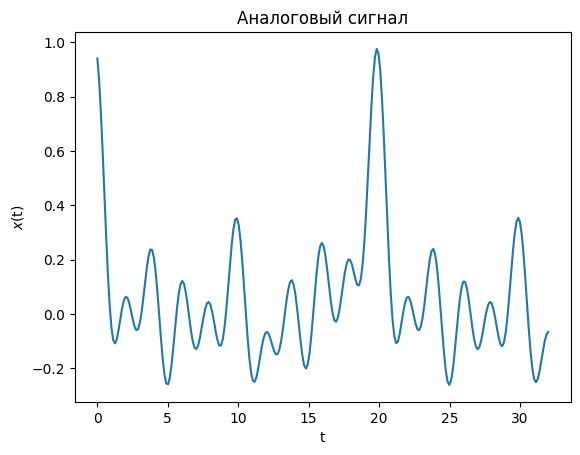

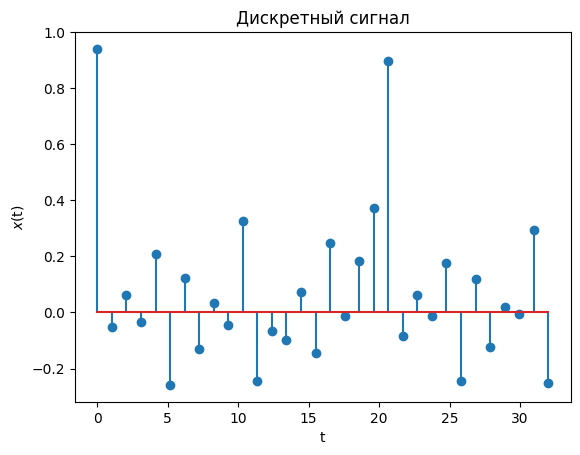

In [2]:
x, y = get_analog(256)
plt.plot(x, y)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Аналоговый сигнал')
plt.show()

x_disc, y_disc = get_discrete(y)
plt.stem(x_disc, y_disc)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал')
plt.show()


### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Представим дискретный сигнал в виде функции от времени:<br>
$ s(t) = \sum_{k=-\infty}^\infty{x_k\delta (t-k)}$ <br>
Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$: <br>
$ S(\omega) = \sum_{k=-\infty}^\infty{x_ke^{-i\omega k}}$ <br>
С другой стороны, представим дискретный сигнал в виде: <br>
$ s_d(t) = \sum_{k=-\infty}^\infty{s(t)\delta (t-kT)}$ <br>
Вынесем $ s(t) $ за знак суммы: <br>
$ s_d(t) = s(t)\sum_{k=-\infty}^\infty{\delta (t-kT)}$ <br>
Сумма может быть представлена комплексным рядом Фурье: <br>
$ \sum_{k=-\infty}^\infty{\delta (t-kT)} = \sum_{k=-\infty}^\infty{c_ke^{i\omega_kt}}$ <br>
где $ \omega_k = \frac{2\pi k}{T}; c_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2}{\delta (t)e^{-i\omega_k t}dt} = \frac{1}{T} $ <br>
Таким образом дискретный сигнал может быть записан в виде: <br>
$ s_d(t) = \frac{1}{T} \sum_{k=-\infty}^\infty{s(t)e*{i\omega_k t}}$, а его спектр <br>
$ S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^\infty{S(\omega - \frac{2\pi k}{T})}$

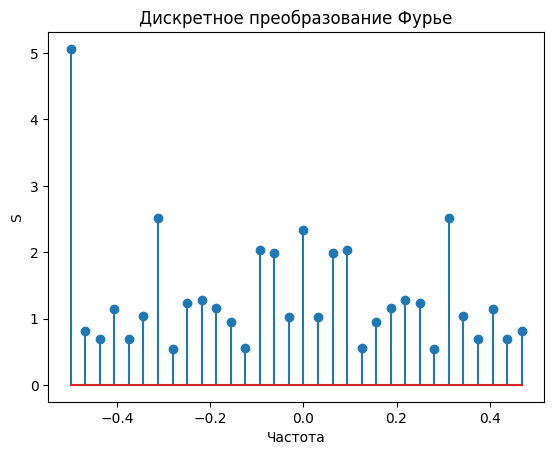

In [3]:
from scipy.fftpack import fft, fftfreq

yf = fft(y_disc)
xf = fftfreq(32, 1)
plt.stem(xf, np.abs(yf))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Дискретное преобразование Фурье')
plt.show()


Спектр сигнала обладает симметрией относительно нулевой частоты, так как он состоит из суммы синусоидальных компонент. Это означает, что каждая частота в сигнале представлена своей амплитудой, а сам спектр повторяется через равные интервалы, что делает его периодическим с периодом 1.

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega) $– передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по 5-ти и 9-ти точкам осуществляется с помощью полинома первой степени, а коэффициенты в передаточной функции одинаковы. Так, в z-области: <br>
$ H_5(z) = 0.2(z^{-2} + z^{-1} + 1 + z^1 + z^2)$ <br>
$ H_9(z) = \frac{1}{9}(z^{-4} + z^{-3} + z^{-2} + z^{-1} + 1 + z^1 + z^2 + z^3 + z^4)$ <br>
Формула передаточной функции (частотной характеристики) фильтра: <br>
$ H(\omega)  = \sin{((N+\frac{1}{2})\omega)}$

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

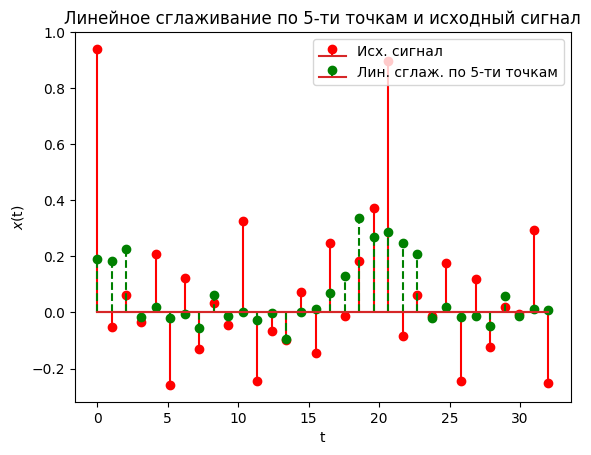

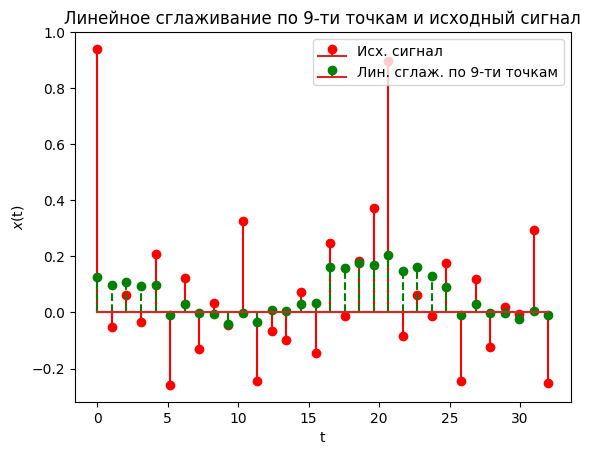

In [4]:
lin_avg_5 = np.convolve(y_disc, np.ones(5), 'same') / 5
lin_avg_9 = np.convolve(y_disc, np.ones(9), 'same') / 9

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, lin_avg_5, 'g--', markerfmt='go', label='Лин. сглаж. по 5-ти точкам')
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.legend()
plt.title('Линейное сглаживание по 5-ти точкам и исходный сигнал')
plt.show()

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, lin_avg_9, 'g--', markerfmt='go', label='Лин. сглаж. по 9-ти точкам')
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.legend()
plt.title('Линейное сглаживание по 9-ти точкам и исходный сигнал')
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

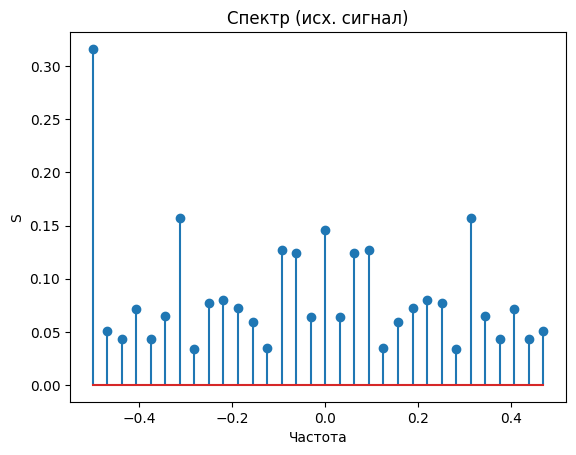

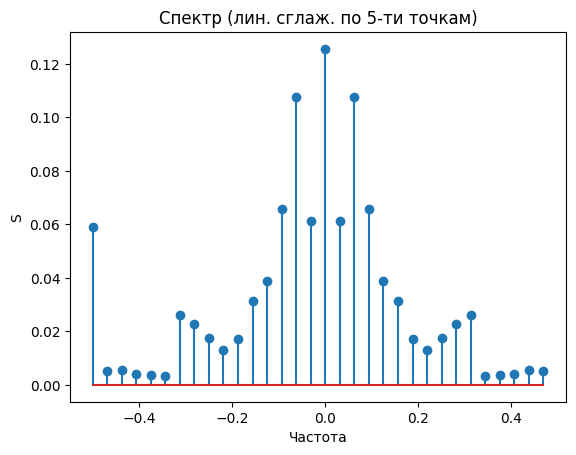

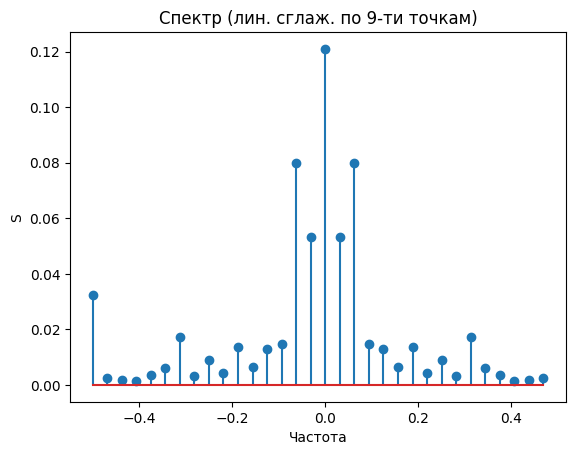

In [5]:
f = fft(y_disc)
f = 2 * np.abs(f) / len(f)
f_5 = fft(lin_avg_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(lin_avg_9)
f_9 = 2 * np.abs(f_9) / len(f_9)

plt.stem(xf, f)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (исх. сигнал)')
plt.show()

plt.stem(xf, f_5)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (лин. сглаж. по 5-ти точкам)')
plt.show()

plt.stem(xf, f_9)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (лин. сглаж. по 9-ти точкам)')
plt.show()


На спектре заметно, что без затухания проходит только постоянный сигнал (с частотой, равной нулю). По мере увеличения количества точек диапазон пропускания сужается.

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

В результате фильтрации амплитуды сигналов подавляются, это становится более заметно при отдалении от нуля дальше от нуля. При увеличении количества точек спектр сильнее сглаживается, то есть происходит более сильное подавление более высоких частот. Полученный результат соответствует значениям $ H(\omega) $, полученным в предыдущей практической работе.

### Задание 8
Повторить п. 4–7 для следующих фильтров:
1) Сглаживание полиномом 2-ой степени по 5 и 9 узлам
2) Сглаживание полиномом 4-ой степени по 7 и 11 узлам


Пункт 1. Сглаживание полиномом 2-ой степени по 5 и 9 узлам. Формулы передаточной функции для 5 и 9 узлов соответственно:
$\\  H(w) =  \frac{1}{35}(17 +  24cos(w) - 6cos(2w)) \\$
$ H(w) = \frac{1}{231}(59 + 108cos(w) + 78cos(2w) + 28cos(3w) - 42cos(4w)) $




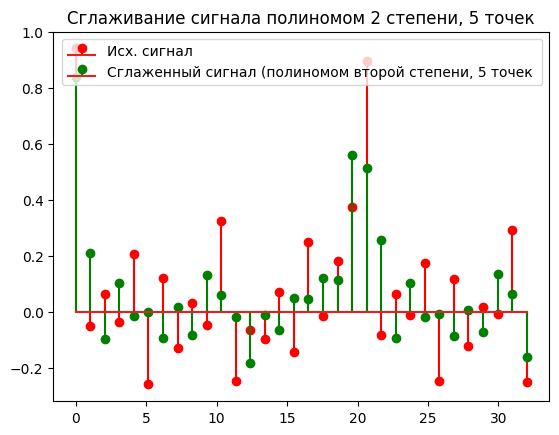

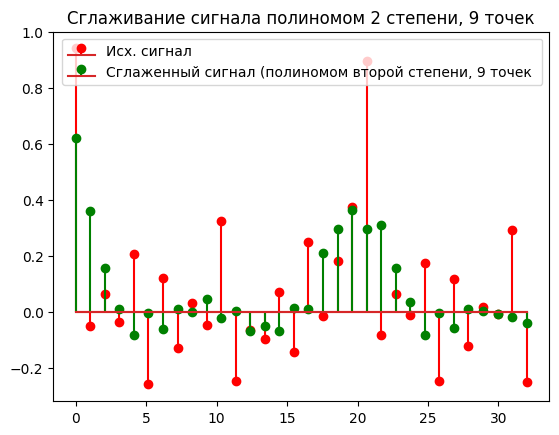

In [ ]:
from scipy.signal import savgol_filter

h5_smooth = savgol_filter(y_disc, 5, 2)
h9_smooth = savgol_filter(y_disc, 9, 2)

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, h5_smooth, 'g', markerfmt='go', label='Сглаженный сигнал (полиномом второй степени, 5 точек ')
plt.legend()
plt.title('Сглаживание сигнала полиномом 2 степени, 5 точек')
plt.show()


plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, h9_smooth, 'g', markerfmt='go', label='Сглаженный сигнал (полиномом второй степени, 9 точек ')
plt.legend()
plt.title('Сглаживание сигнала полиномом 2 степени, 9 точек')
plt.show()



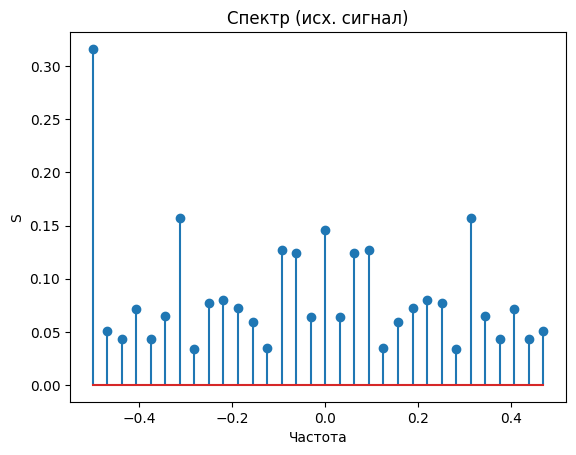

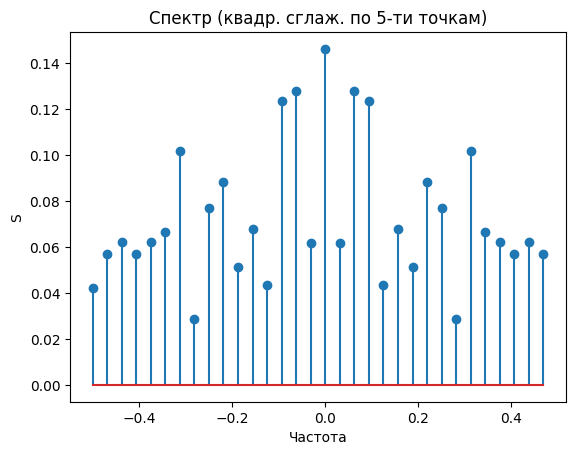

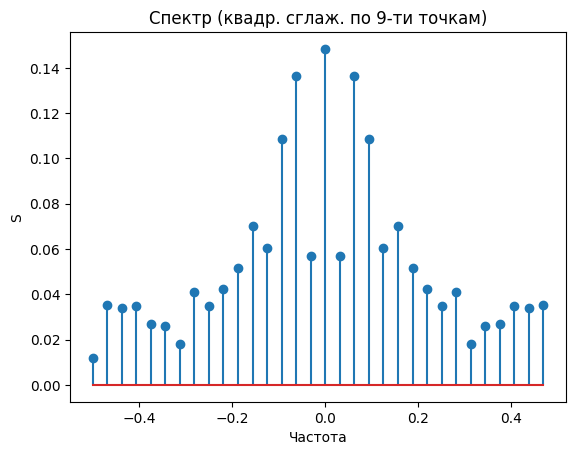

In [27]:
f = fft(y_disc)
f = 2 * np.abs(f) / len(f)
f_5 = fft(h5_smooth)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(h9_smooth)
f_9 = 2 * np.abs(f_9) / len(f_9)

plt.stem(xf, f)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (исх. сигнал)')
plt.show()

plt.stem(xf, f_5)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (квадр. сглаж. по 5-ти точкам)')
plt.show()

plt.stem(xf, f_9)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (квадр. сглаж. по 9-ти точкам)')
plt.show()

На данных графиках видно, что полоса пропускания стала шире относительно предыдущего фильтра, при удалении от 0 полоса пропускания уменьшается. При увеличении количества точек полоса пропускания уменьшается. Полученный результат соответствует значениям H(ω), полученным в предыдущей практической работе.

Пункт 2. Сглаживание полиномом 4-ой степени по 7 и 11 узлам
Формулы передаточной функции для фильтра для 7 и 11 узлов соответственно:
$\\ H(w) =  \frac{1}{231}(131 + 150*cos(w) - 60 * cos(2w) + 10 * cos(3w)) \\$
$ H(w) = \frac{1}{429}(143 + 240 * cos(w) + 120*cos(2w) - 20*cos(3w) -90*cos(4w) + 36*cos(5w)) $

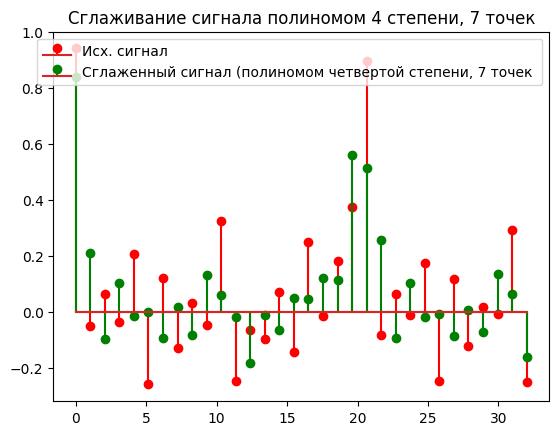

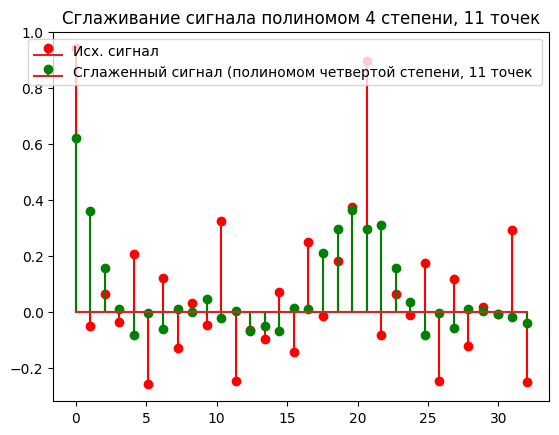

In [26]:
h7_smooth = savgol_filter(y_disc, 7, 4)
h11_smooth = savgol_filter(y_disc, 11, 4)

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, h5_smooth, 'g', markerfmt='go', label='Сглаженный сигнал (полиномом четвертой степени, 7 точек ')
plt.legend()
plt.title('Сглаживание сигнала полиномом 4 степени, 7 точек')
plt.show()


plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, h9_smooth, 'g', markerfmt='go', label='Сглаженный сигнал (полиномом четвертой степени, 11 точек ')
plt.legend()
plt.title('Сглаживание сигнала полиномом 4 степени, 11 точек')
plt.show()

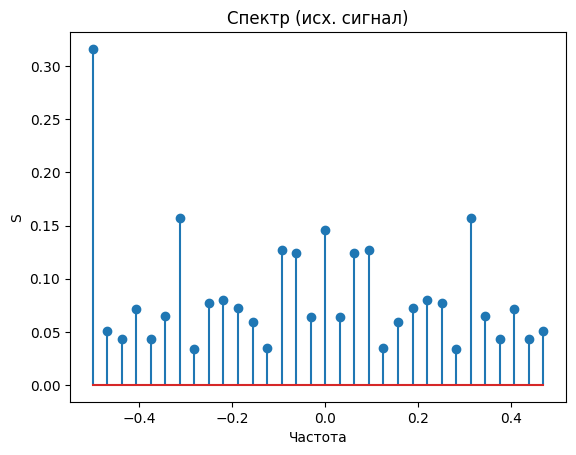

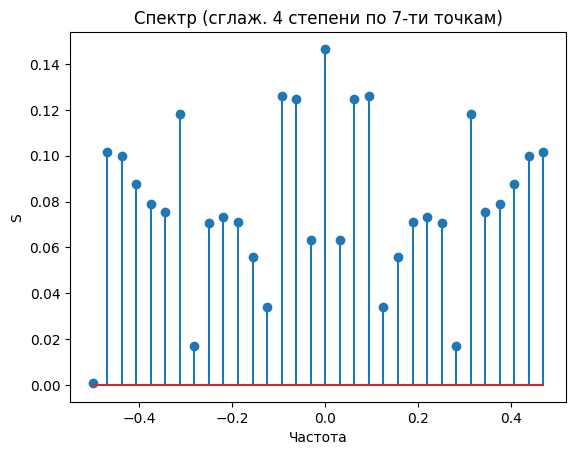

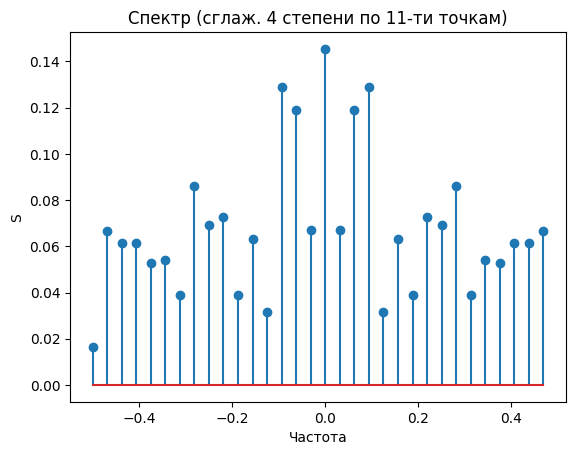

In [28]:
f = fft(y_disc)
f = 2 * np.abs(f) / len(f)
f_7 = fft(h7_smooth)
f_7 = 2 * np.abs(f_7) / len(f_7)
f_11 = fft(h11_smooth)
f_11 = 2 * np.abs(f_11) / len(f_11)

plt.stem(xf, f)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (исх. сигнал)')
plt.show()

plt.stem(xf, f_7)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (сглаж. 4 степени по 7-ти точкам)')
plt.show()

plt.stem(xf, f_11)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (сглаж. 4 степени по 11-ти точкам)')
plt.show()


На данных графиках видно, что полоса пропускания стала немного шире относительно предыдущего фильтра. Так же при удалении от 0 полоса пропускания уменьшается и при увеличении количества точек полоса пропускания уменьшается. Полученный результат соответствует значениям H(ω), полученным в предыдущей практической работе.


## Выводы
В результате выполнения практической работы былы выполнены следующие задачи:
1) при помощи дискретизации непрерывного сигнала в виде линейной комбинации косинусоид вида A_k cos(ω_k t+φ_k), для которых были случайно сгенерированы коэффициенты был сформирован дискретный сигнал
2) Для сформированного дискретного сигнала с помощью преобразования Фурье был построен дискретный спектр
3) Для дискретного сигнала были применены следующие сглаживания:
	- линейное по 5-ти и 9-ти точками
	- полиномомом 2-ой степени по 5-ти и 9-ти точками
	- полиномомом 4-ой степени по 7-ти и 11-ти точками
4) Для сглаженных сигналов также было применено преобразование Фурье для нахождения дискретного спектра сглаженного сигнала
